<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2024/blob/main/case-study/air_case_study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np

In [3]:
dane_csv = [
"https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/air-2024/main/case-study/data/gminy-lokale.csv",
"https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/air-2024/main/case-study/data/gminy-lud-obc.csv",
"https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/air-2024/main/case-study/data/gminy-lud-udzial.csv",
"https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/air-2024/main/case-study/data/gminy-zielone.csv"
]


In [10]:
# wczytujemy pliki csv do listy
dane = [pd.read_csv(file, skiprows=1, sep=";", decimal=",", names=["kod", "nazwa", "wsk", "rok", "wartosc", "jednostka", "atrybut"], na_values="-", dtype={"kod": str, "nazwa": str, "wsk": str, "rok": int, "wartosc": float, "jednostka": str, "atrybut": str}) for file in dane_csv]
dane[3]

,kod,nazwa,wsk,rok,wartosc,jednostka,atrybut
0,0201011,Bolesławiec (1),udział powierzchni terenów zieleni w powierzch...,2015,5.72,%,
1,0201011,Bolesławiec (1),udział powierzchni terenów zieleni w powierzch...,2022,8.08,%,
2,0201011,Bolesławiec (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2015,NaN,szt.,
3,0201011,Bolesławiec (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2022,10.30,szt.,
4,0201022,Bolesławiec (2),udział powierzchni terenów zieleni w powierzch...,2015,0.13,%,
...,...,...,...,...,...,...,...
15447,3262011,Szczecin (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2022,9.70,szt.,
15448,3263011,Świnoujście (1),udział powierzchni terenów zieleni w powierzch...,2015,1.72,%,
15449,3263011,Świnoujście (1),udział powierzchni terenów zieleni w powierzch...,2022,1.30,%,
15450,3263011,Świnoujście (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2015,NaN,szt.,


In [5]:
# laczymy zbiory danych w jeden
dane_all = pd.concat(dane, ignore_index=True)
dane_all

,kod,nazwa,wsk,rok,wartosc,jednostka,atrybut
0,0201011,Bolesławiec (1),przeciętna powierzchnia użytkowa 1 mieszkania,2015,63.20,m2,
1,0201011,Bolesławiec (1),przeciętna powierzchnia użytkowa 1 mieszkania,2022,64.70,m2,
2,0201011,Bolesławiec (1),przeciętna powierzchnia użytkowa mieszkania na...,2015,25.20,m2,
3,0201011,Bolesławiec (1),przeciętna powierzchnia użytkowa mieszkania na...,2022,29.90,m2,
4,0201011,Bolesławiec (1),mieszkania na 1000 mieszkańców,2015,398.00,NaN,
...,...,...,...,...,...,...,...
92867,3262011,Szczecin (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2022,9.70,szt.,
92868,3263011,Świnoujście (1),udział powierzchni terenów zieleni w powierzch...,2015,1.72,%,
92869,3263011,Świnoujście (1),udział powierzchni terenów zieleni w powierzch...,2022,1.30,%,
92870,3263011,Świnoujście (1),liczba nasadzeń drzew i krzewów w zadrzewienia...,2015,NaN,szt.,


In [11]:
# zamieniamy poziomy zmiennej
dane_all["wsk2"] = dane_all["wsk"].map({
  "przeciętna powierzchnia użytkowa 1 mieszkania": "mieszk_powuz_1m",
  "przeciętna powierzchnia użytkowa mieszkania na 1 osobę": "mieszk_powuz_1os",
  "mieszkania na 1000 mieszkańców": "mieszk_na_1000k",
  "przeciętna liczba izb w 1 mieszkaniu": "mieszk_izb_1m",
  "przeciętna liczba osób na 1 mieszkanie": "mieszk_osob_1m",
  "przeciętna liczba osób na 1 izbę": "mieszk_osob_1i",
  "ludność w wieku poprodukcyjnym na 100 osób w wieku produkcyjnym": "ludn_poprod_1000prod",
  "współczynnik obciążenia demograficznego osobami starszymi": "ludn_wsk_obciazenia",
  "w wieku przedprodukcyjnym": "ludn_udz_prze",
  "w wieku produkcyjnym": "ludn_udz_prod",
  "udział powierzchni terenów zieleni w powierzchni ogółem": "zielen_pow",
  "liczba nasadzeń drzew i krzewów w zadrzewieniach oraz terenach zieleni na 1 km2 powierzchni danej jednostki terytorialnej": "zielen_nasadzenia"})
dane_all[["wsk", "wsk2"]]

,wsk,wsk2
0,przeciętna powierzchnia użytkowa 1 mieszkania,mieszk_powuz_1m
1,przeciętna powierzchnia użytkowa 1 mieszkania,mieszk_powuz_1m
2,przeciętna powierzchnia użytkowa mieszkania na...,mieszk_powuz_1os
3,przeciętna powierzchnia użytkowa mieszkania na...,mieszk_powuz_1os
4,mieszkania na 1000 mieszkańców,mieszk_na_1000k
...,...,...
92867,liczba nasadzeń drzew i krzewów w zadrzewienia...,zielen_nasadzenia
92868,udział powierzchni terenów zieleni w powierzch...,zielen_pow
92869,udział powierzchni terenów zieleni w powierzch...,zielen_pow
92870,liczba nasadzeń drzew i krzewów w zadrzewienia...,zielen_nasadzenia


In [56]:
# tworzymy szeroka ramke danych
dane_all_wide = dane_all.pivot(index=["kod", "nazwa", "rok"], columns="wsk2", values="wartosc").reset_index()
dane_all_wide

wsk2,kod,nazwa,rok,ludn_poprod_1000prod,ludn_udz_prod,ludn_udz_prze,ludn_wsk_obciazenia,mieszk_izb_1m,mieszk_na_1000k,mieszk_osob_1i,mieszk_osob_1m,mieszk_powuz_1m,mieszk_powuz_1os,zielen_nasadzenia,zielen_pow
0,0201011,Bolesławiec (1),2015,38.8,60.8,15.5,27.7,3.55,398.0,0.71,2.51,63.2,25.2,NaN,5.72
1,0201011,Bolesławiec (1),2022,50.5,56.1,15.6,39.0,3.52,462.1,0.61,2.16,64.7,29.9,10.3,8.08
2,0201022,Bolesławiec (2),2015,21.7,66.4,19.2,15.1,5.10,277.4,0.71,3.60,118.7,32.9,NaN,0.13
3,0201022,Bolesławiec (2),2022,30.2,60.8,20.8,22.3,5.06,313.7,0.63,3.19,119.5,37.5,0.5,0.14
4,0201032,Gromadka (2),2015,27.3,64.9,17.4,18.9,4.68,313.9,0.68,3.19,89.9,28.2,NaN,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,3261011,Koszalin (1),2022,48.6,56.5,16.0,38.2,3.49,470.5,0.61,2.13,63.1,29.7,19.0,4.79
7738,3262011,Szczecin (1),2015,36.9,61.7,15.6,26.5,3.61,424.8,0.65,2.35,63.9,27.2,NaN,11.37
7739,3262011,Szczecin (1),2022,44.2,58.2,16.1,34.7,3.37,491.5,0.60,2.03,61.7,30.3,9.7,11.97
7740,3263011,Świnoujście (1),2015,37.0,62.6,14.2,26.3,3.81,493.0,0.53,2.03,67.1,33.1,NaN,1.72


In [55]:
# Print the summary statistics of the dataframe
dane_all_wide.describe()

wsk2,rok,ludn_poprod_1000prod,ludn_udz_prod,ludn_udz_prze,ludn_wsk_obciazenia,mieszk_izb_1m,mieszk_na_1000k,mieszk_osob_1i,mieszk_osob_1m,mieszk_powuz_1m,mieszk_powuz_1os,zielen_nasadzenia,zielen_pow
count,7742.000000,7537.000000,7537.000000,7537.000000,7537.000000,7537.000000,7537.00000,7537.000000,7537.000000,7537.000000,7537.000000,3811.000000,7522.000000
mean,2018.500000,33.457012,60.953244,18.833661,25.038477,4.215054,342.84872,0.713950,3.004328,86.415749,29.181531,16.034059,1.264835
std,3.500226,7.683415,2.743925,2.356692,6.203807,0.451514,67.80251,0.098112,0.485404,14.182172,5.470548,134.705615,2.788617
min,2015.000000,14.300000,46.300000,9.700000,9.600000,2.600000,202.80000,0.140000,0.490000,44.900000,17.400000,0.000000,0.000000
25%,2015.000000,27.800000,58.900000,17.200000,20.600000,3.890000,300.60000,0.650000,2.670000,76.100000,25.900000,0.000000,0.090000
50%,2018.500000,32.600000,61.000000,18.800000,24.300000,4.190000,332.90000,0.710000,3.000000,86.600000,28.500000,0.300000,0.210000
75%,2022.000000,38.100000,63.000000,20.300000,28.800000,4.510000,374.10000,0.770000,3.330000,96.200000,31.500000,2.300000,1.047500
max,2022.000000,88.200000,71.300000,30.300000,75.900000,6.100000,2024.50000,1.170000,4.930000,146.200000,154.000000,5901.900000,45.680000


In [65]:
dane_all_wide["mieszk_na_1000k"].isna().sum()

205

In [66]:
dane_all_wide[dane_all_wide["mieszk_na_1000k"].isna()]

wsk2,kod,nazwa,rok,ludn_poprod_1000prod,ludn_udz_prod,ludn_udz_prze,ludn_wsk_obciazenia,mieszk_izb_1m,mieszk_na_1000k,mieszk_osob_1i,mieszk_osob_1m,mieszk_powuz_1m,mieszk_powuz_1os,zielen_nasadzenia,zielen_pow
21,0202031,Pieszyce (1),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0202033,Pieszyce (3),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,0202034,Pieszyce - miasto (4),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0202035,Pieszyce - obszar wiejski (5),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,0224032,Kamieniec Ząbkowicki (2),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,3203042,Ostrowice (2),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7521,3209052,Mielno (2),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7522,3209053,Mielno (3),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7524,3209054,Mielno - miasto (4),2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dane_all_wide=dane_all_wide.fillna(0)
dane_all_wide

In [71]:
analiza2015=dane_all_wide[dane_all_wide["rok"] == 2015]
analiza2022=dane_all_wide[dane_all_wide["rok"] == 2022]

In [106]:
styms = ["mieszk_powuz_1m", "mieszk_powuz_1os", "mieszk_na_1000k", "mieszk_izb_1m", "ludn_udz_prze", "zielen_pow", "ludn_udz_prod"]
destyms = ["mieszk_osob_1m", "mieszk_osob_1i", "ludn_poprod_1000prod", "ludn_wsk_obciazenia"]

In [129]:
stymulanty = analiza2015[styms].apply(lambda x: (x - np.min(x))/(np.max(x) - np.min(x)))
destymulanty = analiza2015[destyms].apply(lambda x: (np.max(x)-x)/(np.max(x) - np.min(x)))

analiza2015_ind = pd.concat([analiza2015[["kod", "nazwa"]], stymulanty, destymulanty], axis = 1)
analiza2015_ind["smr2015"]=analiza2015_ind.loc[:, "mieszk_powuz_1m":"ludn_wsk_obciazenia"].mean(axis = 1)
analiza2015_ind.head()

wsk2,kod,nazwa,mieszk_powuz_1m,mieszk_powuz_1os,mieszk_na_1000k,mieszk_izb_1m,ludn_udz_prze,zielen_pow,ludn_udz_prod,mieszk_osob_1m,mieszk_osob_1i,ludn_poprod_1000prod,ludn_wsk_obciazenia,smr2015
0,0201011,Bolesławiec (1),0.443198,0.199367,0.340695,0.581967,0.540070,0.126409,0.852735,0.490872,0.393162,0.560091,0.635046,0.469419
2,0201022,Bolesławiec (2),0.832398,0.260285,0.237459,0.836066,0.668990,0.002873,0.931276,0.269777,0.393162,0.753968,0.801054,0.544301
4,0201032,Gromadka (2),0.630435,0.223101,0.268704,0.767213,0.606272,0.001547,0.910238,0.352941,0.418803,0.690476,0.750988,0.510974
6,0201043,Nowogrodziec (3),0.627630,0.194620,0.234977,0.790164,0.686411,0.006630,0.913043,0.261663,0.350427,0.733560,0.776021,0.506832
8,0201044,Nowogrodziec - miasto (4),0.562412,0.200949,0.271529,0.683607,0.602787,0.033812,0.925666,0.361055,0.350427,0.713152,0.764163,0.497233


In [130]:
stymulanty = analiza2022[styms].apply(lambda x: (x - np.min(x))/(np.max(x) - np.min(x)))
destymulanty = analiza2022[destyms].apply(lambda x: (np.max(x)-x)/(np.max(x) - np.min(x)))
analiza2022_ind = pd.concat([analiza2022[["kod", "nazwa"]], stymulanty, destymulanty], axis = 1)

analiza2022_ind["smr2022"]=analiza2022_ind.loc[:, "mieszk_powuz_1m":"ludn_wsk_obciazenia"].mean(axis = 1)


In [135]:
analiza_wynik=pd.merge(left = analiza2015_ind[["kod", "nazwa", "smr2015"]],
                       right = analiza2022_ind[["kod", "nazwa", "smr2022"]],
                       how = "outer",
                       on = ["kod", "nazwa"])



In [138]:
analiza_wynik["smr2015_r"]=analiza_wynik["smr2015"].rank()
analiza_wynik["smr2022_r"]=analiza_wynik["smr2022"].rank()
analiza_wynik[analiza_wynik["nazwa"].str.contains("Poznań")]

In [134]:
analiza_wynik[analiza_wynik["smr2015"] > 0.7]

wsk2,kod,nazwa,smr2015,smr2022
3731,3207015,Dziwnów - obszar wiejski (5),0.743154,0.659033


In [118]:
analiza_wynik[analiza_wynik["smr2015"] == analiza_wynik["smr2015"].min()]

wsk2,kod,nazwa,smr2015,smr2022,smr2015_r,smr2022_r
11,0202033,Pieszyce (3),0.0,0.425149,3795.0,3566.0
12,0202034,Pieszyce - miasto (4),0.0,0.416493,3795.0,3725.0
13,0202035,Pieszyce - obszar wiejski (5),0.0,0.459960,3795.0,2168.0
247,0224033,Kamieniec Ząbkowicki (3),0.0,0.449939,3795.0,2643.0
248,0224034,Kamieniec Ząbkowicki - miasto (4),0.0,0.470992,3795.0,1652.0
...,...,...,...,...,...,...
3469,3019034,Kaczory - miasto (4),0.0,0.494729,3795.0,732.0
3470,3019035,Kaczory - obszar wiejski (5),0.0,0.495580,3795.0,702.0
3761,3209053,Mielno (3),0.0,0.536367,3795.0,79.0
3762,3209054,Mielno - miasto (4),0.0,0.504337,3795.0,486.0


<Axes: xlabel='smr2015', ylabel='smr2022'>

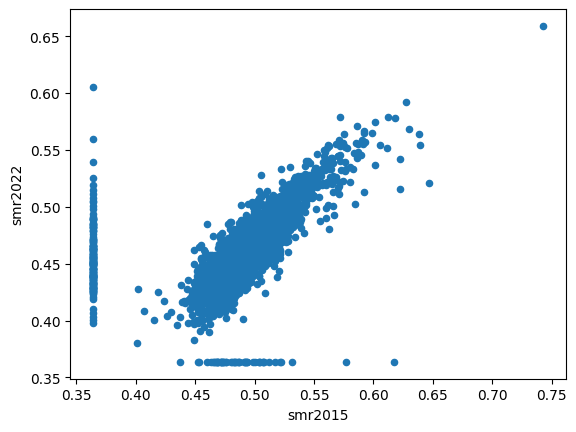

In [133]:
analiza_wynik.plot.scatter(x = "smr2015", y = "smr2022")